This script generates Democratic primary boosted tree models, tested on both the 2018 senate and governor's primaries, without the past turnout or presidential margin data. 

In [24]:
#Import packages
import pandas as pd
import re
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
pd.options.mode.chained_assignment = None 
import numpy as np
from sklearn import metrics
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

np.random.seed(5)

In [25]:
#Read in data and filter out test data

turnout_train_dem = pd.read_csv("turnout_train_dem.csv")



turnout_train_dem_use = turnout_train_dem[turnout_train_dem['Year'] != 2018]





Training
R^2:  0.9106632286889398
Mean Absolute Error (MAE): 1.6128132764458942
Mean Squared Error (MSE): 5.485470570891571


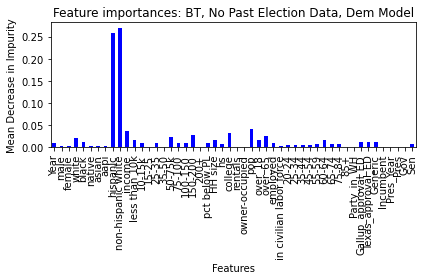

In [26]:

#Boosted Trees: Dem model

turnout_train_dem_mod = turnout_train_dem_use

#Specify features and outcome
model_feats = turnout_train_dem_mod.drop(['past_turnout', 'Rep_Margin', 'Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)
model_outcome = turnout_train_dem_mod['Turnout']

#Create model
bt = GradientBoostingRegressor()
bt.fit(model_feats, model_outcome);

#Make predictions
pred = bt.predict(model_feats)

#Print Score
print("Training")

print("R^2: ",bt.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = bt.feature_importances_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(color = 'blue')
plt.title("Feature importances: BT, No Past Election Data, Dem Model")
plt.ylabel("Mean Decrease in Impurity")
plt.xlabel("Features")
fig.tight_layout()


In [27]:
np.random.seed(5)
#Test on 2018 Senate race
turnout_train_dem_mod = turnout_train_dem

#Specify election
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2018_Dem_Sen']


#Specify features and outcome
model_feats = turnout_train_dem_mod.drop(['past_turnout', 'Rep_Margin', 'Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)
model_outcome = turnout_train_dem_mod['Turnout']

#make predictions
pred = bt.predict(model_feats)

#Print Score
print("Testing: Dem Sen 2018")

print("R^2: ",bt.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



Testing: Dem Sen 2018
R^2:  0.7326578771727601
Mean Absolute Error (MAE): 2.1510400320166676
Mean Squared Error (MSE): 11.263520016772468


In [28]:
np.random.seed(5)
#Test on 2018 Gov race
turnout_train_dem_mod = turnout_train_dem
#Specify election
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2018_Dem_Gov']
#Specify features and outcome
model_feats = turnout_train_dem_mod.drop(['past_turnout', 'Rep_Margin', 'Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)
model_outcome = turnout_train_dem_mod['Turnout']

#make predictions
pred = bt.predict(model_feats)

#Print Score
print("Testing: Dem Gov 2018")

print("R^2: ",bt.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



Testing: Dem Gov 2018
R^2:  0.6589958007304283
Mean Absolute Error (MAE): 2.2942627100730486
Mean Squared Error (MSE): 12.212926255117582
